In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [67]:
df = pd.read_excel('asset.xlsx')

In [45]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,NaN,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              228 non-null    int64  
 1    workclass       228 non-null    object 
 2    fnlwgt          223 non-null    float64
 3    education       228 non-null    object 
 4    education-num   222 non-null    float64
 5    marital-status  228 non-null    object 
 6    occupation      228 non-null    object 
 7    relationship    228 non-null    object 
 8    race            228 non-null    object 
 9    sex             228 non-null    object 
 10   capital-gain    228 non-null    int64  
 11   capital-loss    228 non-null    int64  
 12   hours-per-week  209 non-null    float64
 13   native-country  228 non-null    object 
 14   income          228 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 26.8+ KB


In [46]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [68]:
df.rename(columns=lambda x: x.strip(),inplace=True)

In [64]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [48]:
df['native-country'].unique()

array(['\xa0United-States', '\xa0Cuba', '\xa0Jamaica', '\xa0India',
       '\xa0?', '\xa0Mexico', '\xa0Puerto-Rico', '\xa0England',
       '\xa0Canada', '\xa0Germany', '\xa0Iran', '\xa0Philippines',
       '\xa0Italy', '\xa0Poland'], dtype=object)

In [69]:
df=df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [9]:
#sex_chge = {'Male': 1, 'Female': 0}
#df['sex_num'] = df['sex'].map(sex_chge)

In [70]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'Puerto-Rico', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland'], dtype=object)

### 1. Remove duplicate values from dataset

In [71]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
24,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
25,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
26,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
27,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
28,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,NaN,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
224,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
225,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,NaN,Cuba,<=50K
226,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K


In [72]:
df.drop_duplicates(inplace=True)

In [73]:
df.shape

(165, 15)

### 2. Clean missing values from dataset

In [74]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             5
education          0
education-num      6
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week    10
native-country     0
income             0
dtype: int64

In [75]:
df.replace({'capital-gain':0,'capital-loss':0,'hours-per-week':'','native-country':'?'},np.NaN,inplace=True)

In [76]:
df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,NaN,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,NaN,NaN,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,NaN,NaN,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,NaN,NaN,NaN,Cuba,<=50K
5,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,NaN,NaN,40.0,United-States,<=50K
6,49,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,NaN,NaN,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,45.0,United-States,>50K
8,31,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,NaN,50.0,United-States,>50K
9,42,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,NaN,40.0,United-States,>50K


In [77]:
df.isnull().sum()

age                 0
workclass           0
fnlwgt              5
education           0
education-num       6
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain      151
capital-loss      154
hours-per-week     10
native-country      5
income              0
dtype: int64

In [78]:
col_drop = ['capital-gain','capital-loss','workclass']
df.drop(columns=col_drop, axis=1,inplace=True)

In [80]:
df.isnull().sum()

age                0
fnlwgt             5
education          0
education-num      6
marital-status     0
occupation         0
relationship       0
race               0
sex                0
hours-per-week    10
native-country     5
income             0
dtype: int64

In [81]:
df.dropna(inplace=True)

In [83]:
df.shape

(142, 12)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 220
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             142 non-null    int64  
 1   fnlwgt          142 non-null    float64
 2   education       142 non-null    object 
 3   education-num   142 non-null    float64
 4   marital-status  142 non-null    object 
 5   occupation      142 non-null    object 
 6   relationship    142 non-null    object 
 7   race            142 non-null    object 
 8   sex             142 non-null    object 
 9   hours-per-week  142 non-null    float64
 10  native-country  142 non-null    object 
 11  income          142 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 14.4+ KB


### 3. Remove outlier from data . give python example

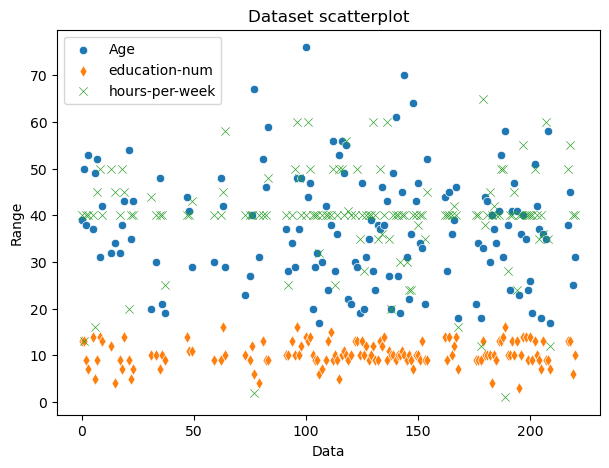

In [85]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x=df.index,y=df.age, label='Age',marker='o')
sns.scatterplot(data=df, x=df.index,y=df['education-num'], label='education-num',marker='d')
sns.scatterplot(data=df, x=df.index,y=df['hours-per-week'], label='hours-per-week',marker='x')
plt.xlabel('Data')
plt.ylabel('Range')
plt.title('Dataset scatterplot')
plt.legend()
plt.show()

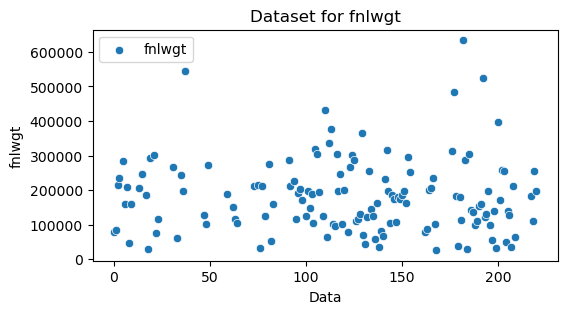

In [86]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df, x=df.index,y=df['fnlwgt'], label='fnlwgt')
plt.xlabel('Data')
plt.title('Dataset for fnlwgt')
plt.legend()
plt.show()

Text(0.5, 0, 'Data')

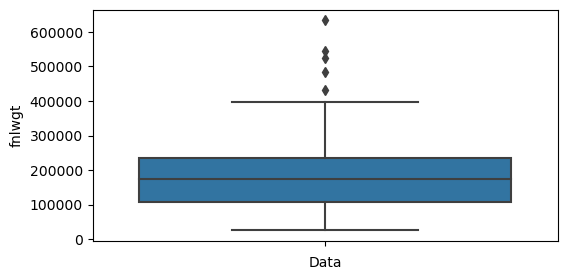

In [87]:
plt.figure(figsize=(6,3))
sns.boxplot(y=df['fnlwgt'])
plt.xlabel('Data')

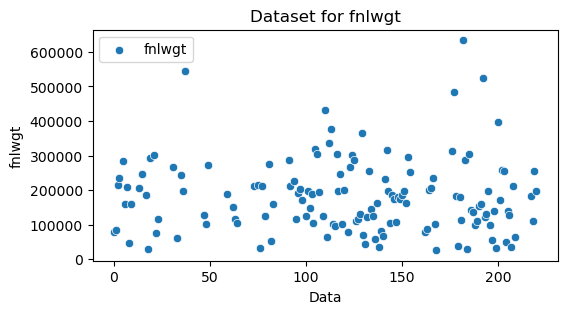

In [88]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df, x=df.index,y=df['fnlwgt'], label='fnlwgt')
plt.xlabel('Data')
plt.title('Dataset for fnlwgt')
plt.legend()
plt.show()

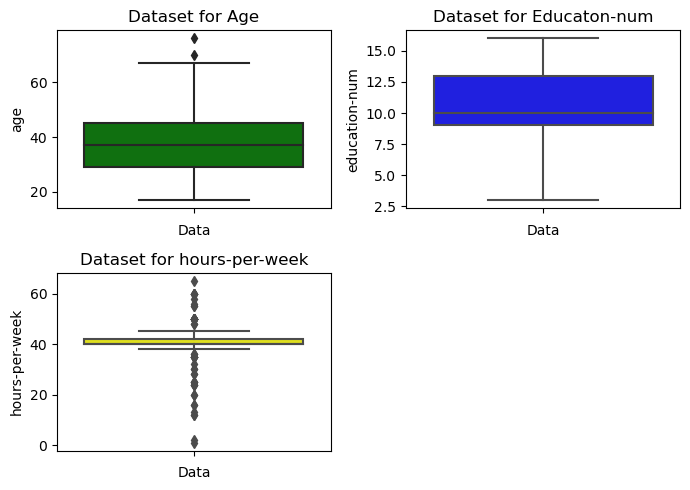

In [26]:
plt.figure(figsize=(7,5))
plt.subplot(2,2,1)
sns.boxplot(y=df.age, color='green')
plt.xlabel('Data')
plt.title('Dataset for Age')

plt.subplot(2,2,2)
sns.boxplot(y=df['education-num'],color='blue')
plt.xlabel('Data')
plt.title('Dataset for Educaton-num')

plt.subplot(2,2,3)
sns.boxplot(y=df['hours-per-week'],color='yellow')
plt.xlabel('Data')
plt.title('Dataset for hours-per-week')
plt.tight_layout()

plt.show()

In [27]:
df.fnlwgt.describe()

count       145.000000
mean     181689.406897
std      106474.516632
min       25828.000000
25%      108293.000000
50%      171095.000000
75%      235485.000000
max      633742.000000
Name: fnlwgt, dtype: float64

In [28]:
df.reset_index(inplace=True)

In [29]:
df.fnlwgt.nlargest(6)

113    633742.0
22     544091.0
123    523910.0
108    483777.0
56     432376.0
131    397317.0
Name: fnlwgt, dtype: float64

In [30]:
df.age.describe()

count    145.000000
mean      37.179310
std       11.919679
min       17.000000
25%       29.000000
50%       37.000000
75%       45.000000
max       76.000000
Name: age, dtype: float64

In [31]:
df.age.nlargest(10)

47     76
89     70
34     67
93     64
85     61
38     59
120    58
139    58
58     56
62     56
Name: age, dtype: int64

In [32]:
df['hours-per-week'].describe()

count    145.000000
mean      39.668966
std       10.137975
min        1.000000
25%       40.000000
50%       40.000000
75%       42.000000
max       65.000000
Name: hours-per-week, dtype: float64

In [33]:
df['hours-per-week'].nlargest(10)

110    65.0
44     60.0
48     60.0
75     60.0
81     60.0
138    60.0
30     58.0
64     56.0
128    55.0
142    55.0
Name: hours-per-week, dtype: float64

In [34]:
df['hours-per-week'].nsmallest(10)

120     1.0
34      2.0
109    12.0
140    12.0
1      13.0
5      16.0
106    16.0
15     20.0
83     20.0
91     24.0
Name: hours-per-week, dtype: float64

In [35]:
df.iloc[120]

index                            189
age                               58
fnlwgt                      109567.0
education                  Doctorate
education-num                   16.0
marital-status    Married-civ-spouse
occupation            Prof-specialty
relationship                 Husband
race                           White
sex                             Male
hours-per-week                   1.0
native-country         United-States
income                          >50K
sex_num                            1
Name: 120, dtype: object

In [36]:
row_drop = [113,22,123,108,56,47,89,120,34]
df.drop(row_drop, axis=0,inplace=True)

In [37]:
df.shape

(136, 14)

Text(0.5, 0, 'Data')

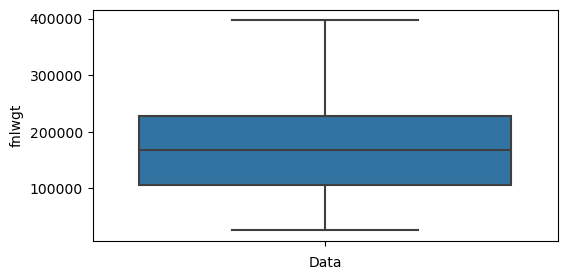

In [38]:
plt.figure(figsize=(6,3))
sns.boxplot(y=df['fnlwgt'])
plt.xlabel('Data')

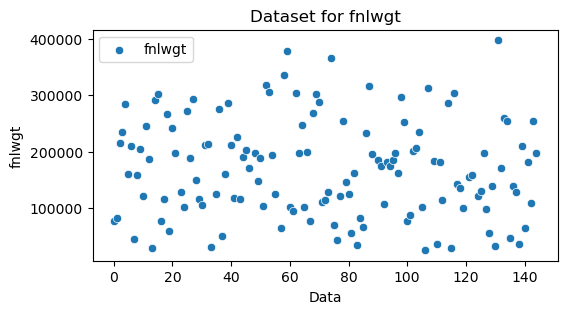

In [39]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df, x=df.index,y=df['fnlwgt'], label='fnlwgt')
plt.xlabel('Data')
plt.title('Dataset for fnlwgt')
plt.legend()
plt.show()

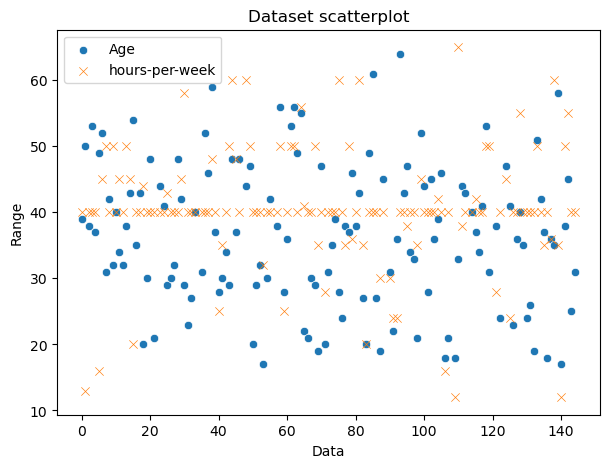

In [40]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x=df.index,y=df.age, label='Age',marker='o')
sns.scatterplot(data=df, x=df.index,y=df['hours-per-week'], label='hours-per-week',marker='x')
plt.xlabel('Data')
plt.ylabel('Range')
plt.title('Dataset scatterplot')
plt.legend()
plt.show()

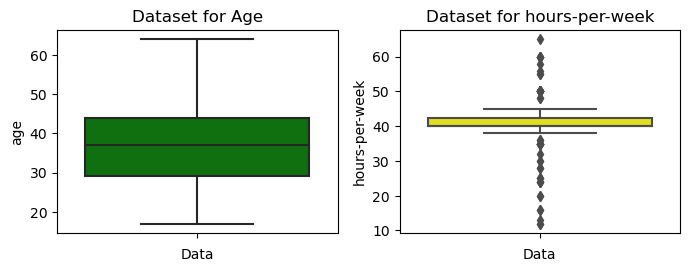

In [41]:
plt.figure(figsize=(7,5))
plt.subplot(2,2,1)
sns.boxplot(y=df.age, color='green')
plt.xlabel('Data')
plt.title('Dataset for Age')

plt.subplot(2,2,2)
sns.boxplot(y=df['hours-per-week'],color='yellow')
plt.xlabel('Data')
plt.title('Dataset for hours-per-week')
plt.tight_layout()

plt.show()

### 4.how to perform Joins in python with example

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 144
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           136 non-null    int64  
 1   age             136 non-null    int64  
 2   fnlwgt          136 non-null    float64
 3   education       136 non-null    object 
 4   education-num   136 non-null    float64
 5   marital-status  136 non-null    object 
 6   occupation      136 non-null    object 
 7   relationship    136 non-null    object 
 8   race            136 non-null    object 
 9   sex             136 non-null    object 
 10  hours-per-week  136 non-null    float64
 11  native-country  136 non-null    object 
 12  income          136 non-null    object 
 13  sex_num         136 non-null    int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 15.9+ KB


In [43]:
df['Join'] = df.age.astype(str) + ', ' + df.education + ', ' + df.race + ', ' + df.sex
df.head()

,index,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,sex_num,Join
0,0,39,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,<=50K,1,"39, Bachelors, White, Male"
1,1,50,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,<=50K,1,"50, Bachelors, White, Male"
2,2,38,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,<=50K,1,"38, HS-grad, White, Male"
3,3,53,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,<=50K,1,"53, 11th, Black, Male"
4,5,37,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,40.0,United-States,<=50K,0,"37, Masters, White, Female"
